In [1]:
import json
import pandas as pd
import numpy as np
import re

In [2]:
file_dir = "C:/Users/wenyi/OneDrive/Desktop/Bootcamp/Analysis Projects/Movies_ETL"
F"{file_dir}filename"

'C:/Users/wenyi/OneDrive/Desktop/Bootcamp/Analysis Projects/Movies_ETLfilename'

In [3]:
with open(F"{file_dir}/wikipedia-movies.json",mode="r") as file:
    wiki_movies_raw = json.load(file)
    print(len(wiki_movies_raw))

7311


In [4]:
# First 5 records
wiki_movies_raw[3600:3605]

[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'},
 {'url': 'https://en.wikipedia.org/wiki/The_Best_Thief_in_the_World',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0389796/',
  'title': 'The Best Thief in the World',
  'Directed by': 'Jacob Kornbluth',
  'Produced by': ['Tim Perrell', 'Nicola Usborne'],
  'Written by': 'Jacob Kornbluth',
  'Starring': ['Marc Rozendaal',
   'Michael Silverman',
   'David Warsh

In [5]:
kaggle_metadata = pd.read_csv(f'{file_dir}/movies_metadata.csv', low_memory=False)
ratings = pd.read_csv(f'{file_dir}/ratings.csv')
kaggle_metadata.sample(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
38901,False,NaN,0,"[{'id': 36, 'name': 'History'}]",NaN,5654,tt0495055,en,War and Peace,War and Peace delineates in graphic detail eve...,...,2007-10-19,0.0,480.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,War and Peace,False,5.6,7.0
5739,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,204372,tt0303396,es,Vagón Fumador,A suicidal young singer named Reni (Cecilia Be...,...,2002-06-12,0.0,91.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,Smokers Only,False,5.0,1.0
20786,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",http://www.cummingsfarm.com/,46451,tt1328909,en,Cummings Farm,Three couples try group sex at a lakeside stra...,...,2010-08-10,0.0,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,All American Orgy,False,3.0,5.0
26769,False,"{'id': 199629, 'name': 'Hercules TV Movies', '...",0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,75834,tt0110019,en,Hercules in the Underworld,When villagers begin disappearing it is discov...,...,1994-11-07,0.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Hercules in the Underworld,False,4.7,23.0
7569,False,NaN,0,"[{'id': 10402, 'name': 'Music'}, {'id': 10749,...",NaN,18283,tt0046807,en,Brigadoon,"Americans Jeff and Tommy, hunting in Scotland,...",...,1954-09-08,0.0,108.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NOW BIGGER THAN EVER IN THE BEAUTY OF COLOR!,Brigadoon,False,6.8,33.0


In [6]:
wiki_movies_df = pd.DataFrame(wiki_movies_raw)
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990.0,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990.0,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990.0,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [8]:
wiki_movies = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie]
len(wiki_movies)

7080

In [9]:
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
7060,https://en.wikipedia.org/wiki/The_Insult_(film),2018.0,https://www.imdb.com/title/tt7048622/,The Insult,Ziad Doueiri,"[Rachid Bouchareb, Jean Bréhat, Julie Gayet, A...",NaN,NaN,NaN,"[Adel Karam, Kamel El Basha]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7293,https://en.wikipedia.org/wiki/Capernaum_(film),2018.0,https://www.imdb.com/title/tt8267604/,Capernaum,Nadine Labaki,"[Michel Merkt, Khaled Mouzanar]","[Nadine Labaki, Jihad Hojaily, Michelle Keserw...","[Georges Khabbaz, Nadine Labaki, Michelle Kese...",NaN,"[Zain Al Rafeea, Yordanos Shiferaw, Boluwatife...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]['url']

7060    https://en.wikipedia.org/wiki/The_Insult_(film)
7293     https://en.wikipedia.org/wiki/Capernaum_(film)
Name: url, dtype: object

In [11]:
sorted(wiki_movies_df.columns.tolist())

['Actor control',
 'Adaptation by',
 'Alias',
 'Alma mater',
 'Also known as',
 'Animation by',
 'Arabic',
 'Area',
 'Area served',
 'Artist(s)',
 'Attraction type',
 'Audio format',
 'Author',
 'Based on',
 'Biographical data',
 'Bopomofo',
 'Born',
 'Box office',
 'Budget',
 'Camera setup',
 'Cantonese',
 'Characters',
 'Children',
 'Chinese',
 'Cinematography',
 'Closing date',
 'Color process',
 'Comics',
 'Composer(s)',
 'Coordinates',
 'Country',
 'Country of origin',
 'Cover artist',
 'Created by',
 'Date premiered',
 'Designer(s)',
 'Developed by',
 'Developer(s)',
 'Dewey Decimal',
 'Died',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Divisions',
 'Duration',
 'Edited by',
 'Editor(s)',
 'Ending theme',
 'Engine',
 'Engine(s)',
 'Executive producer(s)',
 'Family',
 'Fate',
 'Film(s)',
 'Followed by',
 'Format(s)',
 'Formerly',
 'Founded',
 'Founder',
 'Founders',
 'French',
 'Full name',
 'Gender',
 'Genre',
 'Genre(s)',
 'Genres',
 'Gwoyeu Romatzyh',
 'Ha

In [12]:
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    # combine alternate titles into one list
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles
    # merge column names
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')
    
    return movie

In [13]:
clean_movies = [clean_movie(movie) for movie in wiki_movies]

In [14]:
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Camera setup',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Narrated by',
 'No. of episodes',
 'Opening theme',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [15]:
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))
wiki_movies_df.drop_duplicates(subset='imdb_id',inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.head()

7080
7037


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,alt_titles,Preceded by,Suggested by,Recorded,Venue,Label,Animation by,Color process,Camera setup,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


In [16]:
[[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]

[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Based on', 4855],
 ['Starring', 185],
 ['Narrated by', 6755],
 ['Cinematography', 693],
 ['Release date', 32],
 ['Running time', 139],
 ['Country', 236],
 ['Language', 248],
 ['Budget', 2298],
 ['Box office', 1552],
 ['Director', 0],
 ['Distributor', 360],
 ['Editor(s)', 548],
 ['Composer(s)', 519],
 ['Producer(s)', 203],
 ['Production company(s)', 1678],
 ['Writer(s)', 201],
 ['Genre', 6923],
 ['Original language(s)', 6875],
 ['Original network', 6908],
 ['Executive producer(s)', 6937],
 ['Production location(s)', 6987],
 ['Picture format', 6969],
 ['Audio format', 6973],
 ['Voices of', 7035],
 ['Followed by', 7028],
 ['Created by', 7026],
 ['Opening theme', 7036],
 ['No. of episodes', 7033],
 ['alt_titles', 7015],
 ['Preceded by', 7027],
 ['Suggested by', 7036],
 ['Recorded', 7035],
 ['Venue', 7036],
 ['Label', 7035],
 ['Animation by', 7035],
 ['Color process', 7036],
 ['Camera setup', 7036],
 ['imdb_id', 0]]

In [17]:
wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df)*0.9]
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]

In [18]:
wiki_movies_df.dtypes

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Release date             object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Director                 object
Distributor              object
Editor(s)                object
Composer(s)              object
Producer(s)              object
Production company(s)    object
Writer(s)                object
imdb_id                  object
dtype: object

In [19]:
box_office = wiki_movies_df['Box office'].dropna()

In [20]:
wiki_movies_df['Box office'].notnull().sum()

5485

In [21]:
def is_not_a_string(x):
    return type(x) != str

In [22]:
box_office[box_office.map(is_not_a_string)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
75                    [$6,488,144, (US), [1]]
127                [US$1,531,489, (domestic)]
131                          [US$, 4,803,039]
                        ...                  
6984               [$99.6, million, [4], [5]]
6998                   [$365.6, million, [1]]
6999                         [$53.8, million]
7019                     [$435, million, [7]]
7052                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [23]:
box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
75                    [$6,488,144, (US), [1]]
127                [US$1,531,489, (domestic)]
131                          [US$, 4,803,039]
                        ...                  
6984               [$99.6, million, [4], [5]]
6998                   [$365.6, million, [1]]
6999                         [$53.8, million]
7019                     [$435, million, [7]]
7052                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [24]:
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)

In [25]:
box_office.sample(40)

4845                $5,802,422
6690             $19.7 million
1275    $6.6 million (USA) [2]
1016     $1,095,885 (domestic)
2352               $56 million
3720             $15.6 million
120              $20.3 million
5556             $77.1 million
3744            $144.2 million
2639             $68.1 million
798             $135.1 million
3444            $407.7 million
5925             $32.2 million
3178             $77.7 million
3433             $58.9 million
5320            $1.342 billion
884              $50.2 million
1917              $5.6 million
4398               $17,299,151
4723                  $409,832
5559            $425.4 million
6136             $67.8 million
1836             $50.2 million
1469                $2 million
736              $18.6 million
1997            $122.4 million
598                 $3,067,917
6837            $288.3 million
703            $2 million (US)
6685                  $476,720
1239               $33,177,694
1342                $6,858,261
6305    

In [43]:
form_one = r'\$\s*\d+\.?\d*\s*[mb]illion'
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illi?on)'
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])','$', regex = True)

In [44]:
box_office.str.contains(form_one, flags=re.IGNORECASE).sum()

3907

In [45]:
box_office.str.contains(form_two, flags=re.IGNORECASE).sum()

1559

In [46]:
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE)

In [47]:
box_office[~matches_form_one & ~matches_form_two]

602                      $5000 (US)
1072                     35,254,617
1483                     £3 million
1868                   ¥1.1 billion
2036                            N/A
2095                           $309
2669    926,423 admissions (France)
3635                            TBA
3883       CN¥3.650 million (China)
4120                     £7,385,434
4310                            $30
4496                   $47.7 millon
4565        $45.2k (only in Turkey)
5451                          £2.56
5788                       413 733$
6017                        Unknown
6373                          $111k
6374                           $588
6597                 less than $372
6847                        8 crore
6908                    $6.9 millon
Name: Box office, dtype: object

In [48]:
box_office.str.extract(f'({form_one}|{form_two})')

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7074,$19.4 million
7075,$41.9 million
7076,$76.1 million
7077,$38.4 million


In [50]:
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan
    
    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):
                
        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','',s)
        
        # convert to float and multiply by a million
        value = float(s) * 10**6
        
        # return value
        return value
    
    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):
    
        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','',s)
        
        # convert to float and multiply by a billion
        value = float(s) * 10**9
        
        # return value
        return value
    
    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illi?on)', s, flags=re.IGNORECASE):
        # remove dollar sign and commas
        s = re.sub('\$|,','',s)
        
        # convert to float
        value = float(s)
        
        # return value
        return value
    
    # otherwise, return NaN
    else:
        return np.nan

In [51]:
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [52]:
wiki_movies_df['box_office']

0       21400000.0
1        2700000.0
2       57718089.0
3        7331647.0
4        6939946.0
           ...    
7075    41900000.0
7076    76100000.0
7077    38400000.0
7078     5500000.0
7079           NaN
Name: box_office, Length: 7037, dtype: float64

In [53]:
wiki_movies_df.drop('Box office', axis=1, inplace=True)

In [54]:
budget = wiki_movies_df['Budget'].dropna()

In [56]:
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [57]:
form_one = r'\$\s*\d+\.?\d*\s*[mb]illion'
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illi?on)'

In [58]:
budget.str.contains(form_one, flags=re.IGNORECASE).sum()

4362

In [59]:
budget.str.contains(form_two, flags=re.IGNORECASE).sum()

340

In [61]:
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE)
budget = budget.str.replace(r'\[\d+\]\s*', '')
budget[~matches_form_one & ~matches_form_two]

137                         Unknown
205     60 million Norwegian Kroner
479                         Unknown
975                     $34 million
1129                   $120 million
1229                        Unknown
1281                            HBO
1377                     £6,000,000
1400                     13 million
1483                   £2.8 million
1737                   CAD2,000,000
1916     PHP 85 million (estimated)
1951                    102,888,900
1956                   3,500,000 DM
1976                     ₤2,300,874
2285                     $14 milion
2455                     ₤6,350,000
3148                   € 40 million
3364                   $150 million
3422                        $218.32
3806                   £4.2 million
3910                            N/A
3963                    760,000 USD
4474                       19 crore
4645                    £17 million
5038                  $$200 million
5059                   $155 million
5423                    $40 

In [62]:
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [63]:
wiki_movies_df.drop('Budget', axis=1, inplace=True)

In [64]:
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [65]:
release_date

0                            July 11, 1990 ( 1990-07-11 )
1       May 17, 1990 ( 1990-05-17 ) (Cannes Film Marke...
2                          August 10, 1990 ( 1990-08-10 )
3                        December 25, 1990 ( 1990-12-25 )
4                                       December 19, 1990
                              ...                        
7075     December 25, 2018 ( 2018-12-25 ) (United States)
7076    December 11, 2018 ( 2018-12-11 ) ( Samuel Gold...
7077    November 8, 2018 ( 2018-11-08 ) ( AFI Fest ) D...
7078    August 31, 2018 ( 2018-08-31 ) ( Telluride ) D...
7079                      28 December 2018 ( 2018-12-28 )
Name: Release date, Length: 7005, dtype: object

In [66]:
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[123]\d'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'

In [67]:
release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)

,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7075,"December 25, 2018"
7076,"December 11, 2018"
7077,2018
7078,"August 31, 2018"


In [68]:
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)

In [69]:
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [70]:
running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE).sum()

6531

In [71]:
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6504       114 minutes [1] 120 minutes (extended edition)
6647                                             104 mins
6713    90 minutes (theatrical) [1] 91 minutes (unrate...
7061    108 minutes (Original cut) 98 minutes (UK cut)...
7079                Variable; 90 minutes for default path
Name: Running time, Length: 367, dtype: object

In [72]:
running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE).sum()

6881

In [73]:
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE) != True]

670                     UK:84 min (DVD version) US:86 min
729                         78-102 min (depending on cut)
842                       Varies (79 [3] –84 [1] minutes)
1350                                              25 : 03
1446    United States: 77 minutes Argentina: 94 minute...
1502                                            1hr 35min
1554                                               varies
1777                    Netherlands:96 min, Canada:95 min
1780                                       approx. 14 min
2277                                           1 h 43 min
2997                                               1h 48m
3929                                              4 hours
4429    US domestic version: 86 minutes Original versi...
4971    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5428                    115 [1] /123 [2] /128 [3] minutes
5451                                    1 hour 32 minutes
7079                Variable; 90 minutes for default path
Name: Running 

In [74]:
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')

In [75]:
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)

In [76]:
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)

In [77]:
wiki_movies_df.drop('Running time', axis=1, inplace=True)

In [78]:
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [82]:
kaggle_metadata['id']

0           862
1          8844
2         15602
3         31357
4         11862
          ...  
45461    439050
45462    111109
45463     67758
45464    227506
45465    461257
Name: id, Length: 45466, dtype: object

In [83]:
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
Name: adult, dtype: int64

In [84]:
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')

In [86]:
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [87]:
kaggle_metadata['video'] == 'True'

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: video, Length: 45454, dtype: bool

In [88]:
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [89]:
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [90]:
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

In [91]:
ratings.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25997134 entries, 0 to 25997133
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     25997134 non-null  int64  
 1   movieId    25997134 non-null  int64  
 2   rating     25997134 non-null  float64
 3   timestamp  25997134 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 793.4 MB


In [92]:
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
25997129   1996-10-06 13:01:23
25997130   1996-10-06 13:05:04
25997131   1996-10-06 13:04:05
25997132   1996-10-06 13:06:57
25997133   1996-10-06 13:18:58
Name: timestamp, Length: 25997134, dtype: datetime64[ns]

In [93]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

count          25,997,134.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

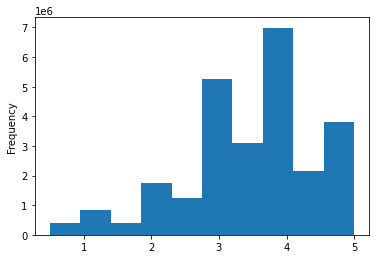

In [94]:
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()